# Data exploration of MovieLens 100k data sets
Dataset: https://grouplens.org/datasets/movielens/

## Load library and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
dir_path = './data/ml-latest-small/'
movies_csv = dir_path + 'movies.csv'
ratings_csv = dir_path + 'ratings.csv'
links_csv = dir_path + 'links.csv'
#tags_csv = dir_path + 'tags.csv'

df_movie = pd.read_csv(movies_csv)
df_rating = pd.read_csv(ratings_csv)
df_link = pd.read_csv(links_csv)
#df_tag = pd.read_csv(tags_csv)

In [2]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Top 5 genres

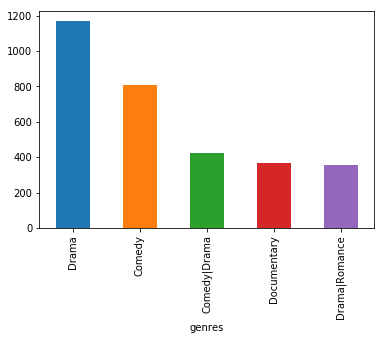

In [4]:
df_movie.groupby(['genres']).size().sort_values(ascending=False).head().plot(kind='bar')

## Distribution of ratings

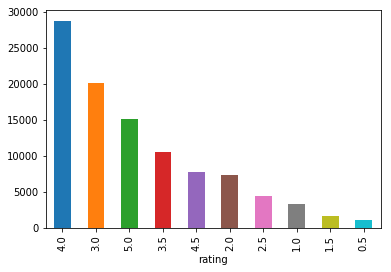

In [5]:
df_rating.groupby(['rating']).size().sort_values(ascending=False).plot(kind='bar')

## Descriptive relation between of rating and user

In [6]:
print '%d out of %d movies are rated by % users.'%(df_rating.drop_duplicates(subset=['movieId']).movieId.count(),
                                                   df_movie.drop_duplicates(subset=['movieId']).movieId.count(),
                                                   df_rating.drop_duplicates(subset=['userId']).userId.count()
                                                  )
print 'min/max # of ratings per user = %d/%d.'% (df_rating.groupby(['userId']).size().min(),df_rating.groupby(['userId']).size().max())
print 'min/max # of ratings per movie = %d/%d.'% (df_rating.groupby(['movieId']).size().min(), df_rating.groupby(['movieId']).size().max())

9066 out of 9125 movies are rated by  671sers.
min/max # of ratings per user = 20/2391.
min/max # of ratings per movie = 1/341.


In [7]:
df_tmp1 = df_rating.drop_duplicates(['movieId','userId']).groupby(['movieId']).count().sort_values(['userId'], ascending=[0])
most_rated_movie_id = df_tmp1.index.values[0]
most_rated_movie_title = df_movie[df_movie['movieId'] == most_rated_movie_id].title.values[0]
print 'Most rated movie is %s by %d user'% (most_rated_movie_title, df_tmp1.userId.values[0])
df_tmp2 = df_rating.drop_duplicates(['movieId','userId']).groupby(['userId']).count().sort_values(['movieId'], ascending=[0])
print 'Most rating user is userId %d who has rated %d movies.' % (df_tmp2.index.values[0],  df_tmp2.movieId.values[0])

Most rated movie is Forrest Gump (1994) by 341 user
Most rating user is userId 547 who has rated 2391 movies.
